## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs

## Load Dataset

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.shape

(506, 14)

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Preprocessing (20 point)

1. lakukan data preprocessing  kecuali melakukan reduksi dimensi

In [ ]:
boston = boston.drop(['ZN', 'CHAS'], axis=1)

In [ ]:
boston.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

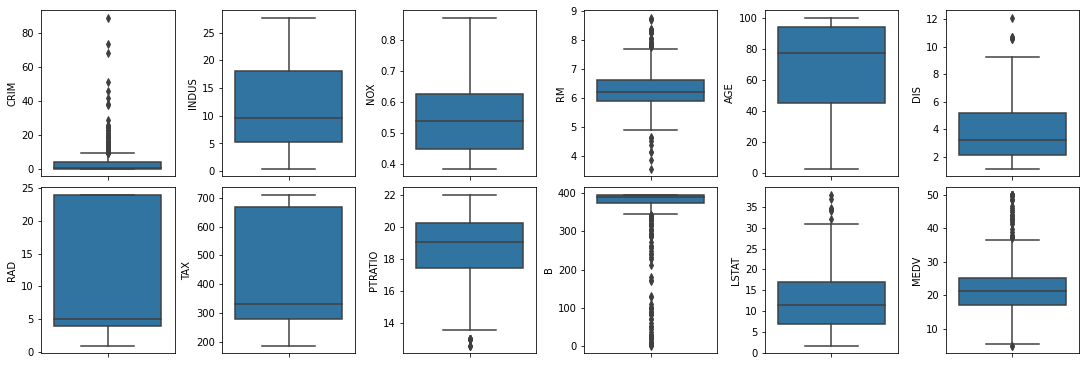

In [ ]:
#check outlier
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in boston.columns:
  sns.boxplot(y=i, data=boston, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

Columns CRIM, RM, DIS, PTRATIO, B, LSTAT and MEDV have outliers

In [ ]:
#check percent outlier
for i in boston.columns:
  boston.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(boston[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = boston[i][(boston[i] < lower_bound) | (boston[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/boston[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))
  #----------------------code below is for comming sections----------------------
  if i == 'B':
    outlierDataB_index = outlier_data.index
    outlierDataB_LB = boston[i][(boston[i] < lower_bound)]
    outlierDataB_UB = boston[i][(boston[i] > upper_bound)]
  elif i == 'CRIM':
    outlierDataCRIM_index = outlier_data.index
    outlierDataCRIM_LB = boston[i][(boston[i] < lower_bound)]
    outlierDataCRIM_UB = boston[i][(boston[i] > upper_bound)]
  elif i == 'MEDV':
    lowerBoundMEDV = lower_bound
    upperBoundMEDV = upper_bound

Outliers in CRIM is 13.04% with count 66
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


In [ ]:
boston2 = boston.copy()

In [ ]:
#removing extreme outliers form B and CRIM (removing those observations)
removed=[]
outlierDataB_LB.sort_values(ascending=True, inplace=True)
outlierDataB_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataB_LB.index:
  if counter<=19:
    boston2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataB_UB.index:
  if counter<=38:
    boston2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataB_LB.index:
  if counter<=38 and i not in removed:
    boston2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)


outlierDataCRIM_LB.sort_values(ascending=True, inplace=True)
outlierDataCRIM_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataCRIM_LB.index:
  if counter<=16 and i not in removed:
    boston2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataCRIM_UB.index:
  if counter<=33 and i not in removed:
    boston2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataCRIM_LB.index:
  if counter<=33 and i not in removed:
    boston2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)

boston2.shape


(435, 12)

In [ ]:
boston3 = boston2.copy()

In [ ]:
#replacing remaning outliers by mean
for i in boston.columns:
  boston.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(boston[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  mean = boston3[i].mean()
  if i != 'MEDV':
    boston3.loc[boston3[i] < lower_bound, [i]] = mean
    boston3.loc[boston3[i] > upper_bound, [i]] = mean
  else:
    boston3.loc[boston3[i] < lower_bound, [i]] = mean
    boston3.loc[boston3[i] > upper_bound, [i]] = 50

In [ ]:
boston3.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,1.054293,10.008575,0.534257,6.266477,64.741609,4.038049,7.409195,369.232184,18.402521,388.243160,11.128671,24.502299
std,1.936962,6.741091,0.108957,0.511640,28.319794,1.960932,7.185681,146.359443,1.945860,10.759893,5.973657,9.616602
min,0.006320,0.460000,0.385000,4.903000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,6.300000
25%,0.068740,4.860000,0.445000,5.926500,40.050000,2.404500,4.000000,276.000000,17.400000,382.557563,6.545000,18.900000
50%,0.173310,8.140000,0.515000,6.230000,70.200000,3.665000,5.000000,307.000000,18.600000,392.520000,9.970000,22.200000
75%,0.846290,18.100000,0.585000,6.550500,91.550000,5.400900,6.000000,403.000000,20.200000,396.260000,14.655000,27.100000
max,8.982960,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


Using p-Value to to select the optimal features:

Dropping all the variables whose p-value is less than significance level of 0.05 using backward elimination method

In [ ]:
X = boston3.iloc[:, :-1]
Y = boston3.iloc[:, 11]

In [ ]:
#Feature selection using P-Value/ Backward elimination
def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) #delete the valriable for that p value
    return w,pvalues,index_max_pvalue

SL = 0.05
ones = np.ones((435,1))  #adding a columns of ones to X as it is required by statsmodels library
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]

W_optimal,pvalues,index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis=1)

In [ ]:
#remaning variabls after backward elimination
X.columns

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

Using pearson correlation to remove any highly correlated independent variables to avoid multicollinearity :

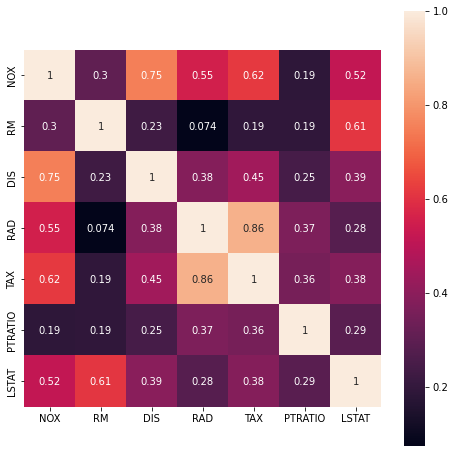

In [ ]:
#Ploting heatmap using pearson correlation among independent variables
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

From above correlation heatmap we can see that:

1. TAX and RAD are highly correlated with score 0.86. As per my personal understandig RAD (index of accessibility to radial highways) will be more important in predicting MEDV as commpared to TAX (full-value property-tax rate per $10,000), so I am considering to drop TAX
2. DIS and NOX are highly correlated with score 0.75. As per my personal understandig DIS (weighted distances to five Boston employment centres) will be more important in predicting MEDV as commpared to NOX (nitric oxides concentration (parts per 10 million)), so I am considering to drop NOX

In [ ]:
#dropping TAX and NOX
X.drop('TAX', axis=1, inplace=True)
X.drop('NOX', axis=1, inplace=True)

#remaning columns after removing multicollinearity
X.columns

Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

### PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5'])
pdf.head()

,pc1,pc2,pc3,pc4,pc5
0,-1.824015,-0.326055,1.118474,0.187857,0.229931
1,-0.951140,-0.325566,-0.128301,0.214062,-0.136455
2,-2.055335,0.908823,0.037788,0.530676,-0.448770
3,-2.006324,0.876261,-0.707314,0.302049,-0.128178
4,-1.917035,0.912328,-0.657468,0.264469,-0.610128


In [ ]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [2.25252138 1.10642876 0.75436413 0.5493588  0.34884766]
Explained variance ratio: [0.44946863 0.22077705 0.15052599 0.10961918 0.06960914]


<BarContainer object of 5 artists>

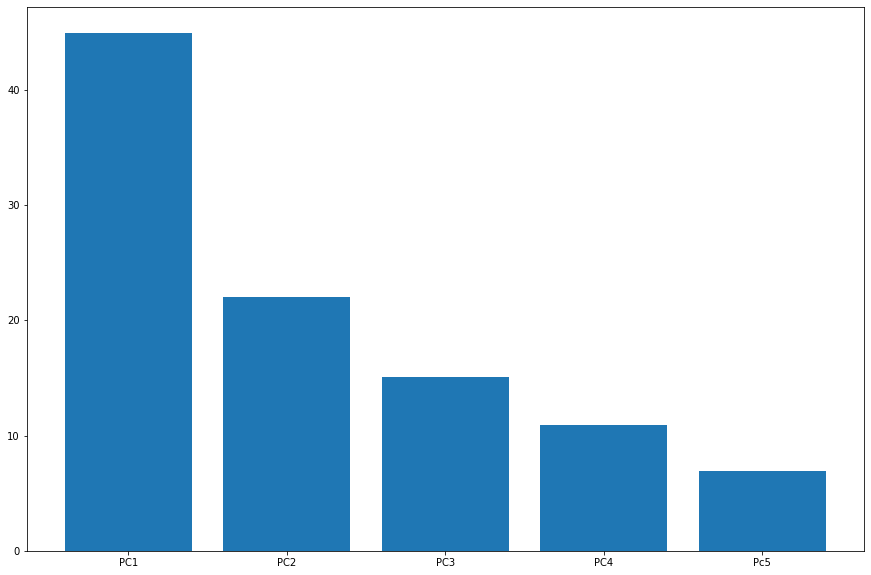

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4','Pc5'], pca.explained_variance_ratio_ * 100)

Cukup menggunakan PC1,PC2, dan PC3 karena sudah mendeskripsikan 81% informasi dari data original

# Reduksi Feature

In [ ]:
pca = PCA(n_components=3)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2','pc3'])
X_std_pca['MEDV'] = y
X_std_pca.head()

,pc1,pc2,pc3,MEDV
0,-1.824015,-0.326055,1.118474,24.0
1,-0.951140,-0.325566,-0.128301,21.6
2,-2.055335,0.908823,0.037788,34.7
3,-2.006324,0.876261,-0.707314,33.4
4,-1.917035,0.912328,-0.657468,36.2


## Regression Model (20 point)

bebas menggunakan model apapun

### Sampling Dataset

In [ ]:
X_pca = X_std_pca.drop('MEDV', axis=1)
y_pca = X_std_pca['MEDV']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_pca,y_pca,
                                                test_size = 0.4,
                                                random_state = 42)

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,
                                                test_size = 0.4,
                                                random_state = 42)

### Modelling with PCA

In [ ]:
model_pca = RandomForestRegressor(n_estimators=100)
model_pca.fit(X_train_pca, Y_train_pca)

RandomForestRegressor()

### Modelling without PCA

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

### Predicting

In [ ]:
y_pred_pca = model_pca.predict(X_test_pca)

In [ ]:
y_pred = model.predict(X_test)

## Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

Without PCA

In [ ]:
model.score(X_test,Y_test)

0.8040274221106765

WIth PCA

In [ ]:
model_pca.score(X_train_pca, Y_train_pca)

0.8977580245724921

Menggunakan PCA lebih baik 